# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Galih Rakasiwi
- **Email:** galihrrka221@gmail.com
- **ID Dicoding:** galihrrka221

## Menentukan Pertanyaan Bisnis

- Is there an increase in bicycle rentals as the year changes?
- Does seasonality affect bicycle rentals?
- How enthusiastic are regular users during the holidays?

## Import Semua Packages/Library yang Digunakan

Before starting the project, the most important step is to load/import all the libraries needed to work on this project.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Next, we load the data that we will process

In [92]:
# Import Data day.csv
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
# Import Data hour.csv
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Checking the Data Type

In [94]:
print('Data frame day:')
day_df.info()

print()

print('Data frame hour:')
hour_df.info()

Data frame day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Data frame hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 ent

- Checking Missing Values Data

In [95]:
# Print the number of missing values in day_df DataFrame
print('Data frame day:')
print(day_df.isna().sum())

print()

# Print the number of missing values in hour DataFrame
print('Data frame hour:')
print(hour_df.isna().sum())


Data frame day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data frame hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


It can be seen from the table above that both data do not have missing values = (0).

- Checking Data Duplication

In [96]:
print('Data frame day:', day_df.duplicated().sum())
print("Data frame hour:", hour_df.duplicated().sum())

Data frame day: 0
Data frame hour: 0


Both data above are free of data duplication


- Checking descriptive statistics

In [97]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [98]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


From the results of the two tables above, we can see and read the descriptive statistics

### Cleaning Data

- Delete unused columns

In [99]:
# Delete the 'windspeed' column from the day_df DataFrame
day_df.drop(columns='windspeed', inplace=True)

# Display the first five rows of the DataFrame after column deletion
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


- Mengkonversi data

In [100]:
# Convert temperature into Celsius form
day_df["temp_C"] = day_df["temp"] * 41
day_df["atemp_C"] = day_df["atemp"] * 50

# Convert humidity to percentage
day_df["hum_percent"] = day_df["hum"] * 100

# Display the first five rows of the DataFrame after conversion
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt,temp_C,atemp_C,hum_percent
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985,14.110847,18.18125,80.5833
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801,14.902598,17.68695,69.6087
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349,8.050924,9.47025,43.7273
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562,8.200000,10.60610,59.0435
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600,9.305237,11.46350,43.6957


- Ensuring the Data Type

In [101]:
# df_day
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
# df_hour
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Check data type for df_day and df_hour
print('day_df["dteday"] : ', day_df["dteday"].dtypes)
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]
hour_df["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

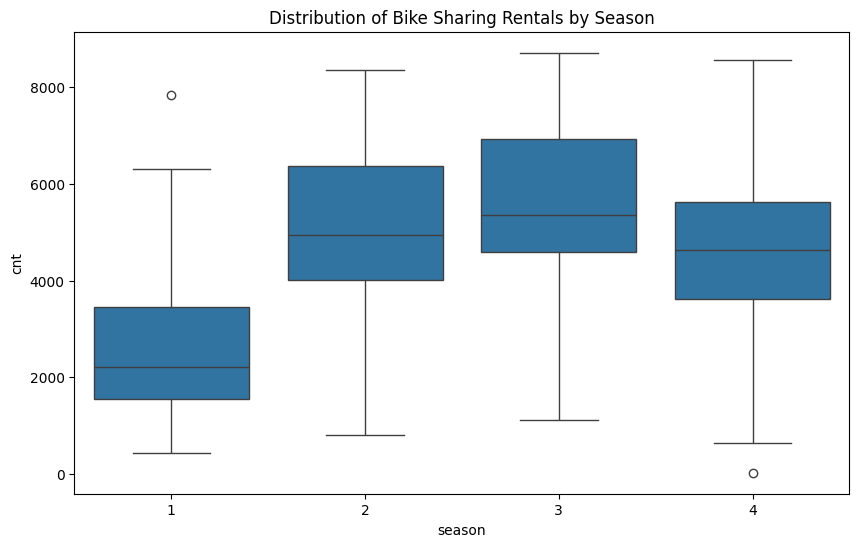

In [102]:
# Distribution of Bike Sharing Rentals in each season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribution of Bike Sharing Rentals by Season')
plt.show()

<ipython-input-103-a9008727ddab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


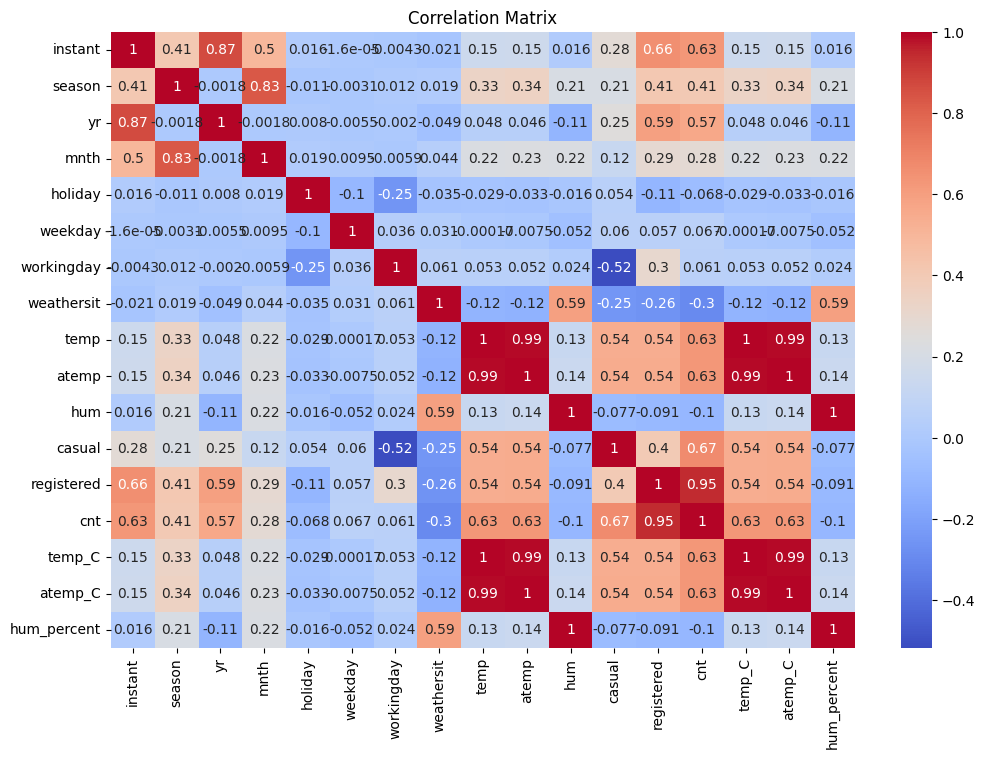

In [103]:
# Correlation between numerical variables
correlation_matrix = day_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

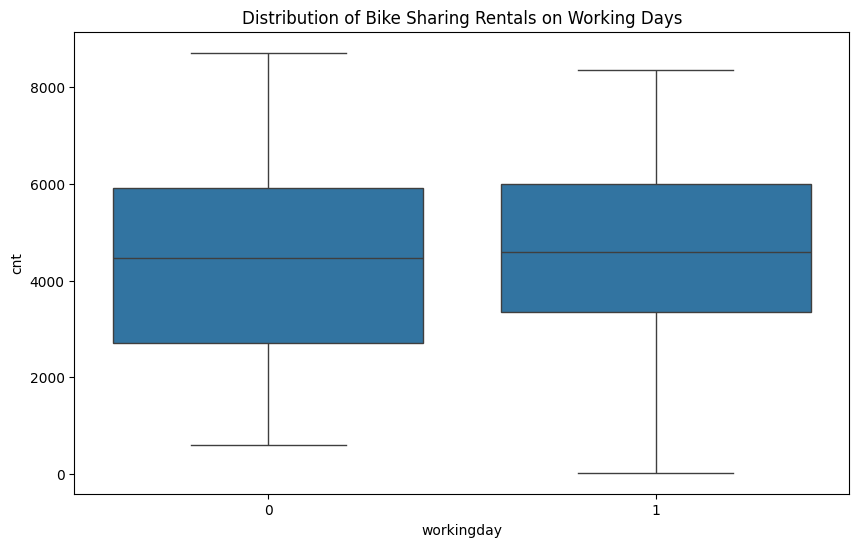

In [104]:
# Distribution on every working day
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Distribution of Bike Sharing Rentals on Working Days')
plt.show()

## Visualization & Explanatory Analysis

### Questions 1: Is there an increase in bicycle rentals as the year changes?



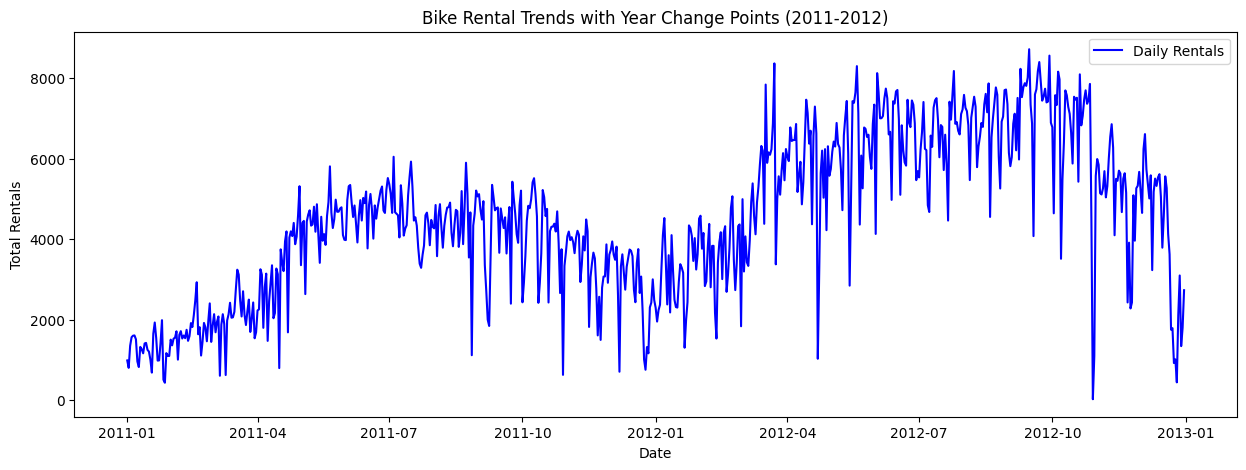

In [105]:
day_df["yr"] = day_df["yr"].apply(lambda x: 2011 if x == 0 else 2012)

plt.figure(figsize=(15, 5))
plt.plot(day_df['dteday'], day_df['cnt'], color='blue', label='Daily Rentals')

plt.title("Bike Rental Trends with Year Change Points (2011-2012)")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.legend()
plt.show()

Based on the visualization above, we can conclude that there must be an increase in bicycle rentals every year, but there must also be a decrease for the following year.

### Questions 2: Does seasonality affect bicycle rentals?

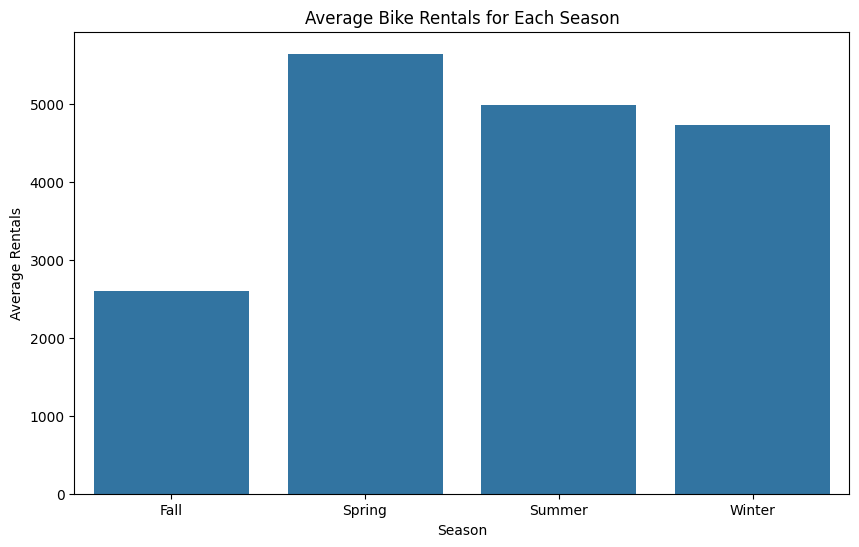

In [106]:
season_mapping = {1: 'Fall', 2: 'Summer', 3: 'Spring', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)

seasonal_analysis = day_df.groupby('season_name').agg({
    'cnt': 'mean',
    'temp': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt', data=seasonal_analysis)
plt.title('Average Bike Rentals for Each Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

Based on the visualization results above, it shows that season is very influential in renting bicycles. From the table above we can see that the spring season occupies the first position for bicycle rental interest while the gugue season occupies the lowest position of interest in renting a bicycle.

### Questions 3: How enthusiastic are regular users during the holidays?

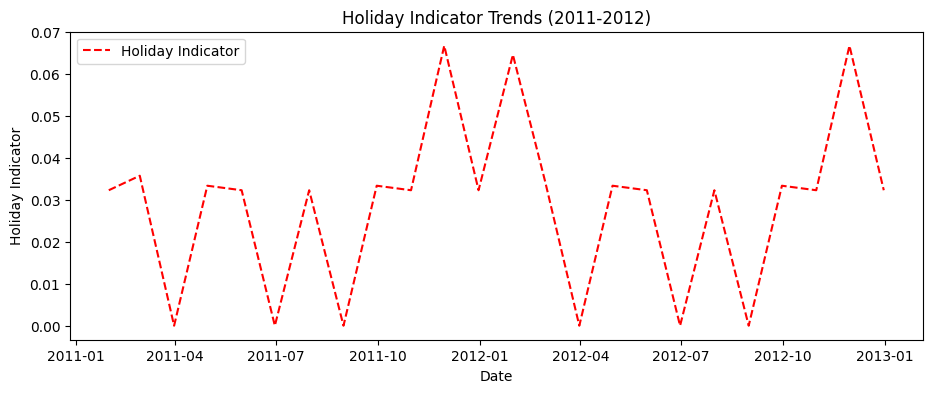

In [107]:
day_df['is_holiday'] = day_df['holiday'] == 1

monthly_df = day_df.resample(rule="M", on="dteday").agg({
    'dteday': 'max',
    'is_holiday': 'mean'
})

plt.figure(figsize=(11, 4))
plt.plot(monthly_df["dteday"], monthly_df["is_holiday"], label='Holiday Indicator', color='red', linestyle='--')

plt.title("Holiday Indicator Trends (2011-2012)")
plt.xlabel("Date")
plt.ylabel("Holiday Indicator")
plt.legend()
plt.show()

Based on the visualization above, we can conclude that the enthusiasm or interest in bicycle rental during the holidays is certainly not always high in rental. Some are very few and some are soaring high.

## Conclusion

- Question 1:
<br>
It can be seen that the total number of bicycle rentals increased from 2011 to 2012. This can be identified from the rising line on the diagram, showing that in 2012 the total number of bike rentals was higher than in 2011. Although we only have two years of data (2011 and 2012), the visualization shows an increasing trend. This could give an indication that the popularity of bicycle rentals is increasing year on year.
- Question 2:
<br>
The visualization and information show that seasonality has a significant influence on bicycle rental rates. The highest interest in bicycle rental occurs in the spring, while the lowest interest occurs in the fall.
- Question 3:
<br>
The visualization shows that the enthusiasm or demand for bicycle rentals during holidays is not always consistent. There is significant variation from one holiday to another. Some holiday periods show high levels of bicycle rentals, while other periods show lower levels of rentals.

In [ ]:
day_df.to_csv("all_data.csv", index=False)